# Exemplo de simulação HPHT (efeito da pressão hidrostática)

Arquivo de configuração

In [1]:
from modules.simulation.config.model import SimulationConfigModel
import pathlib

cfg_path = pathlib.Path("./fixtures/HPHT_config_pressure.yaml")
cfg = SimulationConfigModel.from_file(cfg_path)

cfg

SimulationConfigModel(sim_name='HPHT_simulation_pressure', domain=DomainModel(height=0.21, spatial_divisions=220), suspension=SuspensionModel(initial_conc=0.1391, max_conc=0.19), solid_phase=SolidPhaseModel(particle_diam=4.08e-05, particle_esphericity=0.8, density=2709.0), fluid_phase=FluidPhaseModel(density=891.4, power_law=PowerLawFluidModel(M=30.13, n=0.21)), simulation_parameters=SimulationParameters(timestep=1000.0, total_time=31536000.0), export=FrequencyConfig(frequency=100), report=FrequencyConfig(frequency=1000), HPHT=HPHTModel(temperature=None, pressure=HPHTPressureModel(model='exponential', reference_pressure=0.0, viscosity_factor=-0.0002)), equation_parameters=EquationParameters(delta=0.58, k0=27.99, beta=0.19, ref_conc=0.14, p_ref=18.62))

Instantiate Results Handler

In [2]:
from modules.simulation.sim_handler import SimulationHandler

output_path = pathlib.Path(f"./out/{cfg.sim_name}")
sim_handler = SimulationHandler(cfg=cfg, output_path=output_path)

Run simulation

In [3]:
import time

start = time.time()

sim_handler.start_simulation()

end = time.time()

print("\nTempo total de simulação:" + str(end - start) + " [s]")
print("Status da simulação: " + sim_handler.sim_status)

[2024-05-06 17:51:12,926] [INFO] - simulation - Starting simulation... (sim_handler.py:65)
[2024-05-06 17:51:12,927] [INFO] - simulation - Current time 0 (sim_handler.py:66)
[2024-05-06 17:51:13,555] [INFO] - simulation - Simulation report: Current time 1000000.0 (sim_handler.py:56)
[2024-05-06 17:51:14,170] [INFO] - simulation - Simulation report: Current time 2000000.0 (sim_handler.py:56)
[2024-05-06 17:51:14,789] [INFO] - simulation - Simulation report: Current time 3000000.0 (sim_handler.py:56)
[2024-05-06 17:51:15,416] [INFO] - simulation - Simulation report: Current time 4000000.0 (sim_handler.py:56)
[2024-05-06 17:51:16,037] [INFO] - simulation - Simulation report: Current time 5000000.0 (sim_handler.py:56)
[2024-05-06 17:51:16,658] [INFO] - simulation - Simulation report: Current time 6000000.0 (sim_handler.py:56)
[2024-05-06 17:51:17,299] [INFO] - simulation - Simulation report: Current time 7000000.0 (sim_handler.py:56)
[2024-05-06 17:51:17,913] [INFO] - simulation - Simulati

Export data

In [4]:
sim_handler.export_sim_data()
sim_handler.export_domain_polydata(frequency_reduction=100)

## Read simulation data

In [5]:
from modules.analysis.results_handler import ResultsHandler
import pathlib

output_path = pathlib.Path(f"./out/{cfg.sim_name}")
results_handler = ResultsHandler(simulation_path=output_path)

Plot concentration

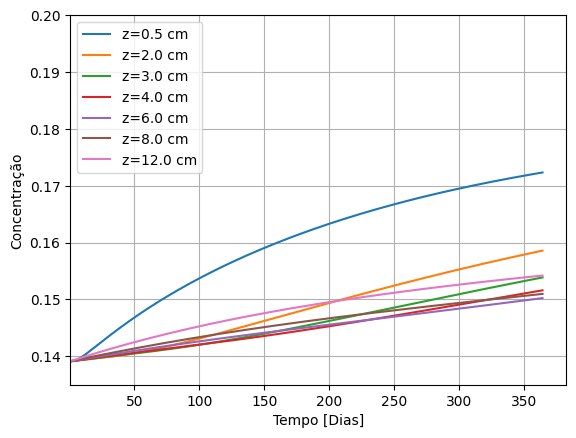

In [6]:
import matplotlib.pyplot as plt

target_positions = [0.005, 0.02, 0.03, 0.04, 0.06, 0.08, 0.12]

time, concentration_profiles = results_handler.filter_for_positions(variable_name="Concentration", position_values=target_positions)

for position_lbl, concentration_arr in concentration_profiles.items():
    plt.plot(time / (3600 * 24), concentration_arr, label=position_lbl)

plt.xlabel('Tempo [Dias]')
plt.xlim(0.400)
plt.ylabel('Concentração')
plt.ylim(0.135,0.2)
plt.grid()

plt.legend()
plt.show()

Plot permeability

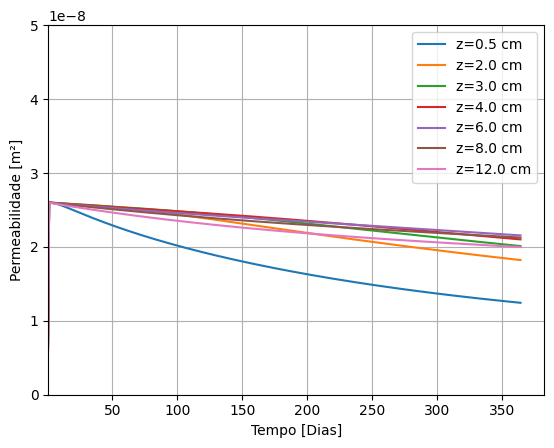

In [7]:
import matplotlib.pyplot as plt

target_positions = [0.005, 0.02, 0.03, 0.04, 0.06, 0.08, 0.12]

time, perm_profiles = results_handler.filter_for_positions(variable_name="Permeability", position_values=target_positions)

for position_lbl, perm_arr in perm_profiles.items():
    plt.plot(time / (3600 * 24), perm_arr, label=position_lbl)

plt.xlabel('Tempo [Dias]')
plt.xlim(0.400)
plt.ylabel('Permeabilidade [m²]')
plt.ylim(0,5e-8)
plt.grid()

plt.legend()
plt.show()

Plot pressure gradient

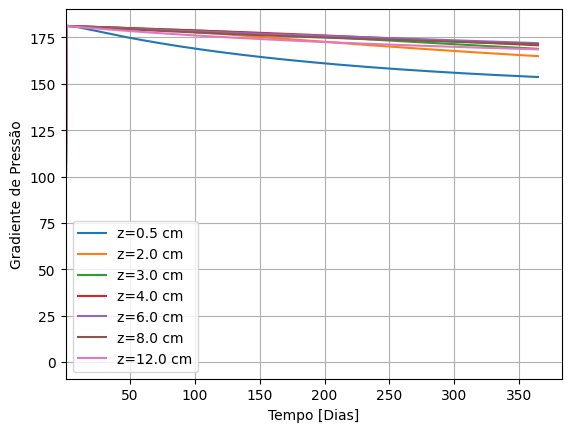

In [8]:
import matplotlib.pyplot as plt

target_positions = [0.005, 0.02, 0.03, 0.04, 0.06, 0.08, 0.12]

time, pressure_grad_profiles = results_handler.filter_for_positions(variable_name="Pressure_Gradient", position_values=target_positions)

for position_lbl, pressure_grad in pressure_grad_profiles.items():
    plt.plot(time / (3600 * 24), pressure_grad, label=position_lbl)

plt.xlabel('Tempo [Dias]')
plt.xlim(0.400)
plt.ylabel('Gradiente de Pressão')
plt.grid()

plt.legend()
plt.show()